# A nasty integral

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
#function f
def fun(x):
    return x**3

check the result of the integral

In [36]:
stdev = [0.1,0.5,0.9,1,2,3]
N= 10000

In [37]:
integral=[]

for sigma in stdev:    
    gauss = norm(loc=0, scale=sigma) #function p
    draws = gauss.rvs(int(N)) 
    
    mask = draws < 0 #select negative values in the gaussian distribution
    xi=draws.copy()
    xi[mask]= - draws[mask]  #change negative values to positive

    integral.append((1/2)*(sigma*np.sqrt(2*np.pi))* np.mean(fun(xi)))

integral = np.array(integral)

In [38]:
integral

array([1.97702029e-04, 1.25731136e-01, 1.30778014e+00, 2.02331674e+00,
       3.08851239e+01, 1.64187318e+02])

In [39]:
expected=[]
for n in stdev:
    expected.append(2*n**4)
expected

[0.00020000000000000004, 0.125, 1.3122, 2, 32, 162]

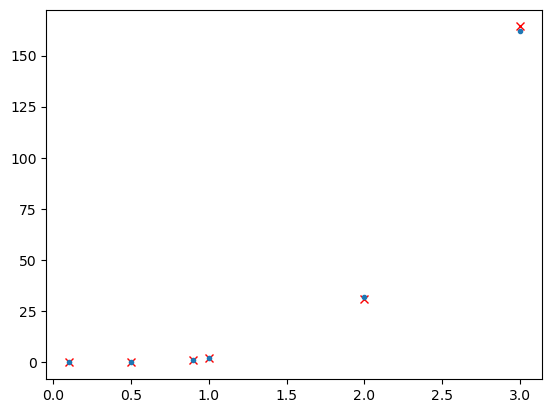

In [40]:
plt.plot(stdev,integral, 'x', c='red') #computed with Monte Carlo
plt.plot(stdev,expected, '.') #expected result of the integral

# Increase N

In [10]:
#parameters
stdev = 2
N=[10,50,100,200,500,1000,2500,5000,10000,25000,50000,100000, 1e6]

In [11]:
integral=[]

for n in N:    
    gauss = norm(loc=0, scale=stdev) #function p
    draws = gauss.rvs(int(n)) 
    
    mask = draws < 0 #select negative values in the gaussian distribution
    xi=draws.copy()
    xi[mask]= - draws[mask]  #change negative values to positive

    integral.append((1/2)*(stdev*np.sqrt(2*np.pi))* np.mean(fun(xi)))

integral = np.array(integral)
error=np.abs(integral-(2*stdev**4)) #error = absolute value(result - expected value)

Does the result converge with N increasing?

In [14]:
integral

array([26.32290663, 24.6588995 , 34.74318791, 30.0744615 , 34.27157905,
       27.89897926, 32.35350205, 31.6833817 , 33.26692085, 31.89457038,
       32.04296242, 31.66853414, 31.9597943 ])

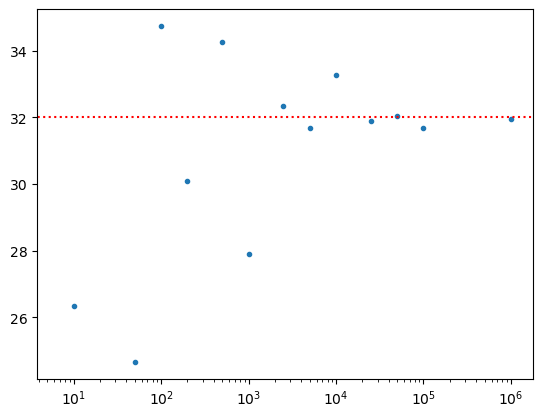

In [12]:
plt.plot(N, integral, '.')
plt.xscale('log')
plt.hlines(2*(stdev**4), 1, 1e7, linestyle='dotted', color='red') #expected value of the integral

How does the error decrease?

In [15]:
error

array([5.67709337, 7.3411005 , 2.74318791, 1.9255385 , 2.27157905,
       4.10102074, 0.35350205, 0.3166183 , 1.26692085, 0.10542962,
       0.04296242, 0.33146586, 0.0402057 ])

Text(0.5, 1.0, 'error')

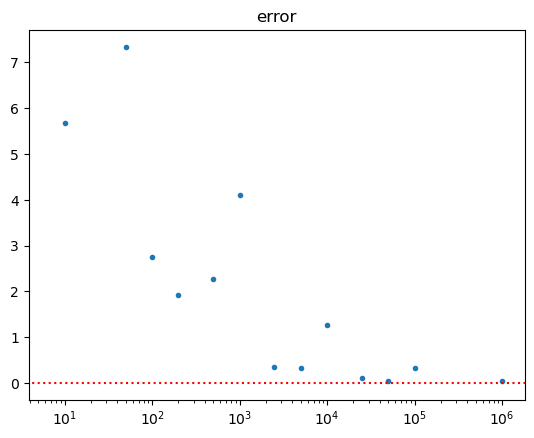

In [13]:
plt.plot(N,error, '.')
plt.xscale('log')
plt.hlines(0, 1, 1e7, linestyle='dotted', color='red') #error expected value = 0
plt.title('error')

# Fix N, repeat many times 

small number of draws

In [84]:
#parameters
stdev = 2
N=100  #small N = number of draws from gaussian 

In [85]:
integral=[]

for i in range (0,500): #repeat the computation of the integral 500 times
    gauss = norm(loc=0, scale=stdev) #function p
    draws = gauss.rvs(N) 

    mask = draws < 0 #select negative values in the gaussian distribution
    xi=draws.copy()
    xi[mask]= - draws[mask] #change negative values to positive
    
    integral.append((1/2)*(stdev*np.sqrt(2*np.pi))* np.mean(fun(xi)))

(array([14., 20., 44., 68., 77., 78., 72., 57., 22., 21., 13.,  8.,  3.,
         2.,  1.]),
 array([17.09865977, 19.82002538, 22.54139098, 25.26275659, 27.98412219,
        30.7054878 , 33.4268534 , 36.14821901, 38.86958462, 41.59095022,
        44.31231583, 47.03368143, 49.75504704, 52.47641264, 55.19777825,
        57.91914386]),
 [<matplotlib.patches.Polygon at 0x12b990a10>])

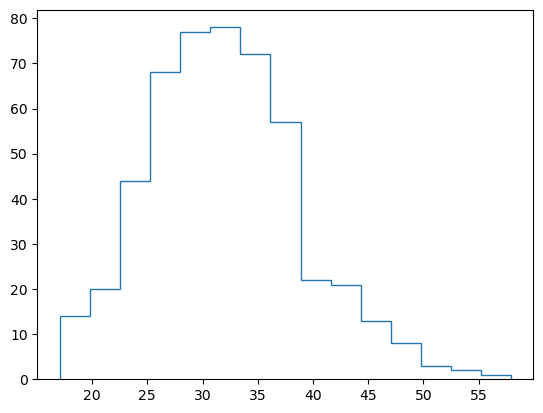

In [86]:
plt.hist(integral, bins=15, histtype='step')

big number of draws

In [3]:
#parameters
stdev = 2
N=1000000  #big N = number of draws from gaussian

In [4]:
integral=[]

for i in range (0,1000):  #repeat the computation of the integral 1000 times
    gauss = norm(loc=0, scale=stdev) #function p
    draws = gauss.rvs(N) 

    mask = draws < 0 #select negative values in the gaussian distribution
    xi=draws.copy()
    xi[mask]= - draws[mask] #change negative values to positive
    
    integral.append((1/2)*(stdev*np.sqrt(2*np.pi))* np.mean(fun(xi)))

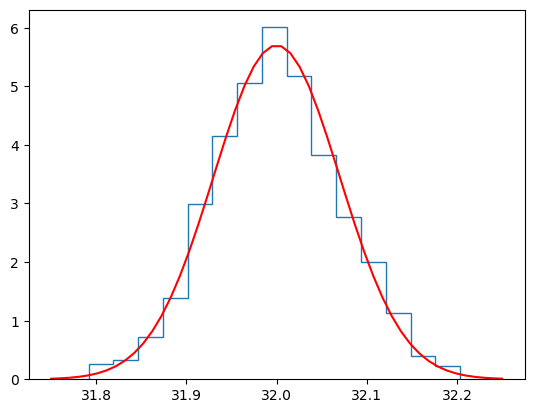

In [5]:
plt.hist(integral, bins=15, density=True, histtype='step')

#fit with gaussian
sigma = 0.07
mu = 2*(stdev**4)
x = np.linspace(31.75, 32.25, 50)
dist = norm(mu, sigma)
plt.plot(x, dist.pdf(x), c='red')